# U2AF2
U2AF65 is an essential pre-mRNA splicing factor that guides the early stages of splice-site choice by recognizing polypyrimidine tract consensus sequences near the 3-prime splice site.
[developmental delay, dysmorphic facies, and brain anomalies (DEVDFB](https://omim.org/entry/620535) is caused by heterozygous mutation in the U2AF2 gene.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.6.1.dev0


## U2AF2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for U2AF2.

In [2]:
gene_symbol = 'U2AF2'
mane_tx_id = 'NM_007279.3'
mane_protein_id = "NP_009210.1" # splicing factor U2AF 65 kDa subunit isoform a

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.20'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))


cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals from {gene_symbol} cohort')
qc.summarize()

Individuals Processed: 100%|██████████| 49/49 [00:38<00:00,  1.28individuals/s]
Loaded 49 individuals from U2AF2 cohort
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #12
    phenotype-features
     warnings:

  patient #18
    phenotype-features
      #0
       warnings:

      #1
       warnings:

      #2
       warnings:

      #3
       warnings:

    diseases
      #0
       warnings:

  patient #41
    phenotype-features
      #0
       warnings:

    diseases
      #0
       warnings:

  patient #47
    diseases
      #0
       warnings:

  patient #48
    phenotype-features
     warnings:



In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,43
Delayed speech and language development,HP:0000750,41
Delayed fine motor development,HP:0010862,35
Intellectual disability,HP:0001249,30
Short palpebral fissure,HP:0012745,28
Micrognathia,HP:0000347,27
Feeding difficulties,HP:0011968,26
Downslanted palpebral fissures,HP:0000494,26
Prominent forehead,HP:0011220,26
Delayed ability to walk,HP:0031936,25


<Axes: title={'center': 'Splicing factor U2AF 65 kDa subunit\ntranscript: NM_007279.3, protein: NP_009210.1'}>

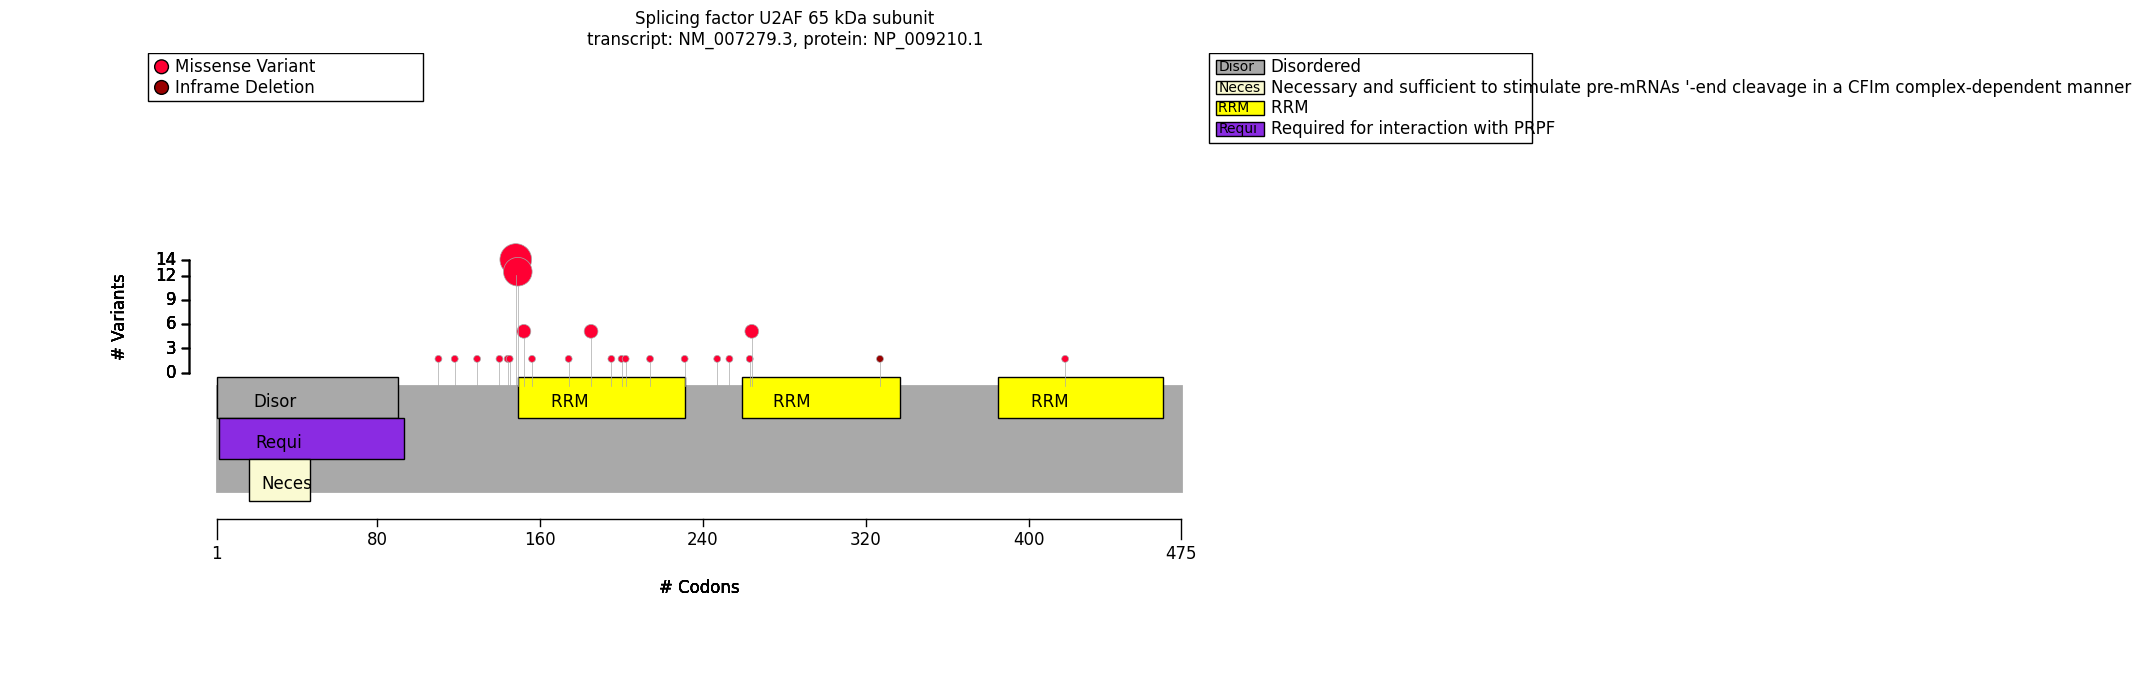

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService, configure_default_protein_metadata_service
from gpsea.model import ProteinMetadata
from gpsea.view import ProteinVisualizable, ProteinVisualizer

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id) 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

12	19_55661148_55661148_C_T	c.445C>T	p.Arg149Trp	MISSENSE_VARIANT
7	19_55661151_55661151_C_T	c.448C>T	p.Arg150Cys	MISSENSE_VARIANT
4	19_55661152_55661152_G_A	c.449G>A	p.Arg150His	MISSENSE_VARIANT

In [6]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)
len(pheno_predicates)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter( hpo=hpo)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest

count_statistic = FisherExactTest()
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
     mtc_alpha=mtc_alpha,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

r149w = VariantPredicates.variant_key(key="19_55661148_55661148_C_T") # c.445C>T	p.Arg149Trp	
r150c = VariantPredicates.variant_key(key="19_55661151_55661151_C_T") # c.448C>T	p.Arg150Cys	
r150h = VariantPredicates.variant_key(key="19_55661152_55661152_G_A") # c.449G>A	p.Arg150His





gt_predicate = monoallelic_predicate(a_predicate=r149w, 
                                   b_predicate=~r149w, 
                                   a_label="r149w",
                                   b_label="other",
                                   )
print(gt_predicate.display_question())
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(result)

Allele group: r149w, other


Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,20
HMF03,Skipping term because of a child term with the same individual counts,15
HMF07,Skipping non phenotype term,3
HMF08,Skipping general term,113
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,547


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=result)

Allele group                                      r149w          other  \
                                                  Count Percent  Count   
Deeply set eye [HP:0000490]                       10/10    100%  11/29   
Ptosis [HP:0000508]                                8/10     80%   7/23   
Short neck [HP:0000470]                             8/9     89%  11/26   
Short finger [HP:0009381]                           3/6     50%   1/20   
Short hallux [HP:0010109]                           2/5     40%   0/19   
...                                                 ...     ...    ...   
Abnormal facial skeleton morphology [HP:0011821]    8/8    100%  24/24   
Abnormality of the vertebral column [HP:0000925]    9/9    100%  15/15   
Abnormality of the frontal hairline [HP:0000599]    5/5    100%  15/15   
Abnormality of the hairline [HP:0009553]            5/5    100%  16/16   
Congenital abnormal hair pattern [HP:0011361]       5/5    100%  18/18   

Allele group                                                                 \
                                                 Percent Corrected p values   
Deeply set eye [HP:0000490]                          38%           0.038042   
Ptosis [HP:0000508]                                  30%           0.423328   
Short neck [HP:0000470]                              42%           0.423328   
Short finger [HP:0009381]                             5%           0.423328   
Short hallux [HP:0010109]                             0%           0.436220   
...                                                  ...                ...   
Abnormal facial skeleton morphology [HP:0011821]    100%           1.000000   
Abnormality of the vertebral column [HP:0000925]    100%           1.000000   
Abnormality of the frontal hairline [HP:0000599]    100%           1.000000   
Abnormality of the hairline [HP:0009553]            100%           1.000000   
Congenital abnormal hair pattern [HP:0011361]       100%           1.000000   

Allele group                                                
                                                  p values  
Deeply set eye [HP:0000490]                       0.000624  
Ptosis [HP:0000508]                               0.019994  
Short neck [HP:0000470]                           0.022061  
Short finger [HP:0009381]                         0.027759  
Short hallux [HP:0010109]                         0.036232  
...                                                    ...  
Abnormal facial skeleton morphology [HP:0011821]  1.000000  
Abnormality of the vertebral column [HP:0000925]  1.000000  
Abnormality of the frontal hairline [HP:0000599]  1.000000  
Abnormality of the hairline [HP:0009553]          1.000000  
Congenital abnormal hair pattern [HP:0011361]     1.000000  

[61 rows x 6 columns]

Allele group                                      r149w          other  \
                                                  Count Percent  Count   
Deeply set eye [HP:0000490]                       10/10    100%  11/29   
Ptosis [HP:0000508]                                8/10     80%   7/23   
Short neck [HP:0000470]                             8/9     89%  11/26   
Short finger [HP:0009381]                           3/6     50%   1/20   
Short hallux [HP:0010109]                           2/5     40%   0/19   
...                                                 ...     ...    ...   
Abnormal facial skeleton morphology [HP:0011821]    8/8    100%  24/24   
Abnormality of the vertebral column [HP:0000925]    9/9    100%  15/15   
Abnormality of the frontal hairline [HP:0000599]    5/5    100%  15/15   
Abnormality of the hairline [HP:0009553]            5/5    100%  16/16   
Congenital abnormal hair pattern [HP:0011361]       5/5    100%  18/18   

Allele group                                                                 \
                                                 Percent Corrected p values   
Deeply set eye [HP:0000490]                          38%           0.038042   
Ptosis [HP:0000508]                                  30%           0.423328   
Short neck [HP:0000470]                              42%           0.423328   
Short finger [HP:0009381]                             5%           0.423328   
Short hallux [HP:0010109]                             0%           0.436220   
...                                                  ...                ...   
Abnormal facial skeleton morphology [HP:0011821]    100%           1.000000   
Abnormality of the vertebral column [HP:0000925]    100%           1.000000   
Abnormality of the frontal hairline [HP:0000599]    100%           1.000000   
Abnormality of the hairline [HP:0009553]            100%           1.000000   
Congenital abnormal hair pattern [HP:0011361]       100%           1.000000   

Allele group                                                
                                                  p values  
Deeply set eye [HP:0000490]                       0.000624  
Ptosis [HP:0000508]                               0.019994  
Short neck [HP:0000470]                           0.022061  
Short finger [HP:0009381]                         0.027759  
Short hallux [HP:0010109]                         0.036232  
...                                                    ...  
Abnormal facial skeleton morphology [HP:0011821]  1.000000  
Abnormality of the vertebral column [HP:0000925]  1.000000  
Abnormality of the frontal hairline [HP:0000599]  1.000000  
Abnormality of the hairline [HP:0009553]          1.000000  
Congenital abnormal hair pattern [HP:0011361]     1.000000  

[61 rows x 6 columns]